In [7]:
import cv2
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

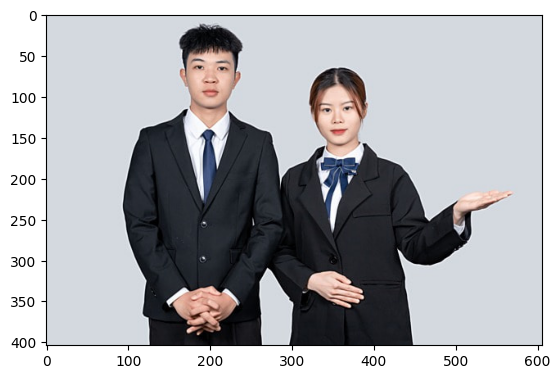

In [8]:
# Read the image
image = cv2.imread('.\double.jpg')

# Convert to RGB color space if needed
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.show()

In [9]:
'''# 转换为RGB颜色空间（如果需要）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 可以考虑降低图像分辨率以减少计算量
scale_percent = 25  # 比例为原始大小的百分比
width = int(image_rgb.shape[1] * scale_percent / 100)
height = int(image_rgb.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(image_rgb, dim, interpolation=cv2.INTER_AREA)

resized=image_rgb
# 展平图像，因为DBSCAN需要二维数据
pixels = image_rgb.reshape((-1, 3))
'''

'# 转换为RGB颜色空间（如果需要）\nimage_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)\n\n# 可以考虑降低图像分辨率以减少计算量\nscale_percent = 25  # 比例为原始大小的百分比\nwidth = int(image_rgb.shape[1] * scale_percent / 100)\nheight = int(image_rgb.shape[0] * scale_percent / 100)\ndim = (width, height)\nresized = cv2.resize(image_rgb, dim, interpolation=cv2.INTER_AREA)\n\nresized=image_rgb\n# 展平图像，因为DBSCAN需要二维数据\npixels = image_rgb.reshape((-1, 3))\n'

In [10]:
''''# 标准化颜色特征
scaler = StandardScaler()
normalized_pixels = scaler.fit_transform(pixels)
'''

"'# 标准化颜色特征\nscaler = StandardScaler()\nnormalized_pixels = scaler.fit_transform(pixels)\n"

In [11]:
'''
# 应用DBSCAN
# 这里的参数需要根据您的具体图像和预期效果进行调整
dbscan = DBSCAN(eps=0.04, min_samples=8)
clusters = dbscan.fit_predict(normalized_pixels)
clusters
'''

'\n# 应用DBSCAN\n# 这里的参数需要根据您的具体图像和预期效果进行调整\ndbscan = DBSCAN(eps=0.04, min_samples=8)\nclusters = dbscan.fit_predict(normalized_pixels)\nclusters\n'

In [29]:
import cv2
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('.\double.jpg')

# Convert to RGB color space
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image to reduce computational load
scale_percent = 25  # Scale down by 25%
width = int(image_rgb.shape[1] * scale_percent / 100)
height = int(image_rgb.shape[0] * scale_percent / 100)
dim = (width, height)
image_rgb = cv2.resize(image_rgb, dim, interpolation=cv2.INTER_AREA)

# Flatten the image for DBSCAN
pixels = image_rgb.reshape((-1, 3))

# Standardize the color features
scaler = StandardScaler()
normalized_pixels = scaler.fit_transform(pixels)

# Apply DBSCAN
# Adjust these parameters based on your image and desired effect
dbscan = DBSCAN(eps=0.04, min_samples=8)
clusters = dbscan.fit_predict(normalized_pixels)
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

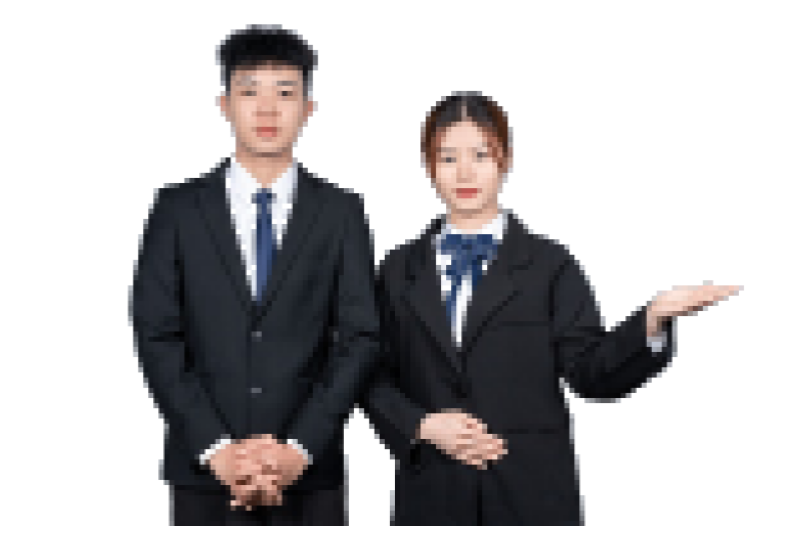

In [42]:
# Creating a mask for distinguishing background and foreground
mask = clusters == 0
# ... [previous code for DBSCAN clustering] ...

# Reshaping mask to the size of the image used in DBSCAN
mask_image = mask.reshape(image_rgb.shape[0], image_rgb.shape[1])

# Fill the background with white color
segmented_image = np.zeros_like(image_rgb)
segmented_image[mask_image] = 255  # White background
segmented_image[~mask_image] = image_rgb[~mask_image]  # Keep the foreground

# Convert the segmented image back to BGR for correct display with OpenCV
segmented_image_bgr = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR)

# Resize the segmented image to original dimensions
original_height, original_width = image.shape[:2]
segmented_image_resized = cv2.resize(segmented_image_bgr, (original_width, original_height), interpolation=cv2.INTER_AREA)

# Set the size for display
plt.figure(figsize=(10, 10))  # Image width-to-height ratio

# Display the image
plt.imshow(cv2.cvtColor(segmented_image_resized, cv2.COLOR_BGR2RGB))  # Convert to RGB for displaying with matplotlib
plt.axis('off')  # Turn off the axis
plt.show()

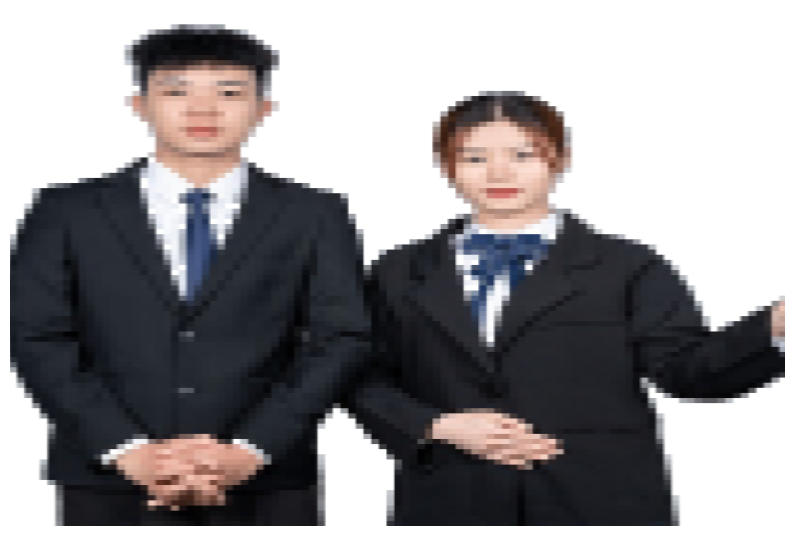

In [45]:
import cv2
import matplotlib.pyplot as plt

def widen_image_and_crop(image, factor=1.5):
    """
    将图像横向展宽并裁剪黑边
    :param image: 原始图像
    :param factor: 展宽因子，大于1表示展宽
    :return: 展宽并裁剪后的图像
    """
    height, width = image.shape[:2]

    # 展宽图像
    new_width = int(width * factor)
    resized_image = cv2.resize(image, (new_width, height))

    # 计算裁剪区域
    start_x = int((new_width - width) / 2)
    end_x = start_x + width

    # 裁剪图像
    cropped_image = resized_image[:, start_x:end_x]

    return cropped_image

# 应用扭曲并裁剪
widened_cropped_image = widen_image_and_crop(segmented_image_resized)

# 显示处理后的图像
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(widened_cropped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

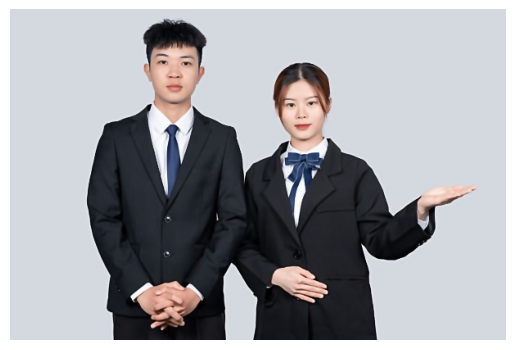

In [65]:
import cv2
import numpy as np

def skin_smoothing(img,  smoothing_level=5):
    """
    对图像进行磨皮处理
    :param img: 原始图像
    :param mask: 掩码，确定磨皮的区域
    :param smoothing_level: 磨皮程度，数值越大磨皮效果越强
    :return: 磨皮后的图像
    """
    # 使用双边滤波进行磨皮处理
    smoothed_img = cv2.bilateralFilter(img, d=smoothing_level, sigmaColor=75, sigmaSpace=75)

    # 仅在掩码区域应用磨皮效果
    #result_img = img.copy()
    #result_img[mask] = smoothed_img[mask]


    return smoothed_img

# 假设 segmented_image_resized 是之前处理的图像
# 假设 mask 是相应的掩码，已调整大小以匹配图像
# 宽度和高度缩小4倍
new_width = widened_cropped_image.shape[1] // 4
new_height = widened_cropped_image.shape[0] // 4

# 使用OpenCV的resize函数来缩小图像
smaller_image = cv2.resize(widened_cropped_image, (new_width, new_height))
# 应用磨皮
# 假设 mask 是相应的掩码，已调整大小以匹配新的图像大小
#new_mask = cv2.resize(mask, (new_width, new_height))

# 应用磨皮
#smoothed_image = skin_smoothing(image_rgb, new_mask, smoothing_level=5)

smoothed_image = skin_smoothing(image, smoothing_level=5)

# 保存处理后的图片
plt.imshow(cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [48]:
image_rgb.shape

(101, 151, 3)

In [54]:
smaller_image.shape

(101, 151, 3)

In [15]:
import cv2
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt

# Read and preprocess the image
image = cv2.imread('.\double.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#image_rgb = cv2.resize(image_rgb, (int(image_rgb.shape[1] * 25 / 100), int(image_rgb.shape[0] * 25 / 100)), interpolation=cv2.INTER_AREA)
# Flatten the image for DBSCAN
pixels = image_rgb.reshape((-1, 3))

# Standardize the color features
scaler = StandardScaler()
normalized_pixels = scaler.fit_transform(pixels)

# Identify and remove near-duplicate points
# Define a threshold for near-duplicates
threshold = 0.01  # This threshold value might need adjustment
distances = cosine_distances(normalized_pixels)
near_duplicates = distances < threshold
unique_pixels, counts = np.unique(near_duplicates, return_counts=True, axis=0)

# Apply DBSCAN with sample_weight
dbscan = DBSCAN(eps=0.04, min_samples=8, metric='cosine')
clusters = dbscan.fit_predict(unique_pixels, sample_weight=counts)
# Create and display the segmented image
mask = clusters == 0
#mask_image = mask.reshape(image_rgb.shape[0], image_rgb.shape[1])
segmented_image = np.zeros_like(image_rgb)
segmented_image[mask_image] = 255
segmented_image[~mask_image] = image_rgb[~mask_image]
segmented_image_bgr = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR)
segmented_image_resized = cv2.resize(segmented_image_bgr, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_AREA)
plt.figure(figsize=(10, 10))
# Display the segmented image
plt.imshow(cv2.cvtColor(segmented_image_resized, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

MemoryError: Unable to allocate 447. GiB for an array with shape (244824, 244824) and data type float64

In [ ]:

# 创建一个mask，用于区分背景和前景
# 假设DBSCAN将背景标记为类别0
mask = clusters == 0

# 将mask转换成图像尺寸
mask_image = mask.reshape(resized.shape[0], resized.shape[1])

# 用白色填充背景
segmented_image = np.zeros_like(resized)
segmented_image[mask_image] = 255  # 白色背景
segmented_image[~mask_image] = resized[~mask_image]  # 保留前景

# 将BGR图像转换为RGB图像以正确显示
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 设置显示的图像大小
plt.figure(figsize=(10, 10))  # 这里的数字表示图像的宽高比例

# 显示图像
plt.imshow(segmented_image)
plt.axis('off')  # 关闭坐标轴
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import cv2
import numpy as np

# 读取图像
image = cv2.imread('.\images.jpg')

# 转换到 RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 缩放图像以减少计算量
scale_percent = 25  # 图像大小的百分比
width = int(image_rgb.shape[1] * scale_percent / 100)
height = int(image_rgb.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(image_rgb, dim, interpolation=cv2.INTER_AREA)

# 展平图像
pixels = resized.reshape((-1, 3))

# 特征标准化
scaler = StandardScaler()
normalized_pixels = scaler.fit_transform(pixels)

# 应用 DBSCAN
# 注意：这里的 'eps' 和 'min_samples' 是示例值，你可能需要根据你的图像调整这些参数
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(normalized_pixels)

# 3D可视化
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 把像素点按照它们所属的类别着色
# 如果DBSCAN没有找到多个类别，那么 `np.unique(clusters)` 只会有一个元素
unique_labels = np.unique(clusters)
for label in unique_labels:
    if label == -1:
        # 使用黑色来表示噪声。
        ax.scatter(normalized_pixels[clusters == label, 0], normalized_pixels[clusters == label, 1], normalized_pixels[clusters == label, 2], c='k', s=0.1, label='Noise')
    else:
        ax.scatter(normalized_pixels[clusters == label, 0], normalized_pixels[clusters == label, 1], normalized_pixels[clusters == label, 2], s=0.1, label=f'Cluster {label}')

ax.set_xlabel('Channel 1')
ax.set_ylabel('Channel 2')
ax.set_zlabel('Channel 3')
plt.title('3D visualization of image pixels in color space')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# 假设 'clusters' 是DBSCAN算法在缩放图像上运行的结果
# 转换clusters为NumPy数组，如果它还不是
clusters = np.array(clusters)

# 假设 'resized' 是缩放后的图像，我们需要它的形状来重塑mask
# 这里我们使用相同的缩放比例来重塑mask
scale_percent = 25  # 假设我们原来缩放了25%
width = int(image_rgb.shape[1] * scale_percent / 100)
height = int(image_rgb.shape[0] * scale_percent / 100)
dim = (width, height)
# 标准化颜色特征
scaler = StandardScaler()
normalized_pixels = scaler.fit_transform(pixels)
# 应用DBSCAN
# 这里的参数需要根据您的具体图像和预期效果进行调整
dbscan = DBSCAN(eps=0.04, min_samples=8)
clusters = dbscan.fit_predict(normalized_pixels)
# 创建一个mask来区分背景和前景，假设DBSCAN将背景标记为类别0
#mask = clusters.reshape(dim)
# 创建一个mask，用于区分背景和前景
# 假设DBSCAN将背景标记为类别0
mask = clusters == 0

# 将mask转换成图像尺寸
mask_image = mask.reshape(resized.shape[0], resized.shape[1])

# 用白色填充背景
segmented_image = np.zeros_like(resized)
segmented_image[mask_image] = 255  # 白色背景
segmented_image[~mask_image] = resized[~mask_image]  # 保留前景
# 放大mask以匹配原始图像的尺寸
mask_image = cv2.resize(mask.astype('float32'), (image_rgb.shape[1], image_rgb.shape[0]), interpolation=cv2.INTER_NEAREST)

# 生成分割后的图像
segmented_image = np.zeros_like(image_rgb)
# 对于mask中的前景像素，我们用原始图像中相应的像素替换
segmented_image[mask_image == 0] = image_rgb[mask_image == 0]  # 前景
# 对于背景像素，我们可以选择保持原样，或者将它们设置为白色或其他颜色
segmented_image[mask_image != 0] = [255, 255, 255]  # 背景设置为白色

# 显示原始图像和分割后的图像
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image with Original Quality')
plt.axis('off')

plt.show()